## Problem Description

You are given the heads of two sorted linked lists `list1` and `list2`.

Merge the two lists into one sorted list. The list should be made by splicing together the nodes of the first two lists.

Return the head of the merged linked list.

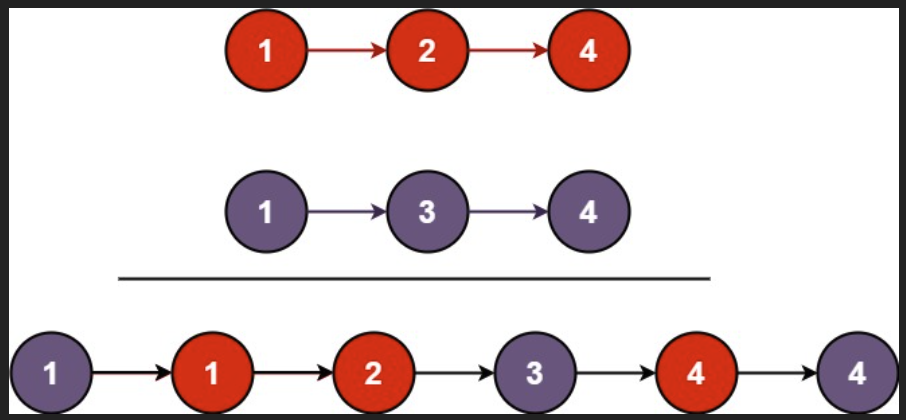

### Constraints:

The number of nodes in both lists is in the range `[0, 50]`.

`-100 <= Node.val <= 100`

Both `list1` and `list2` are sorted in non-decreasing order.

### Questions to ask for this problem:
- What is splicing operation?
- Do 2 given lists have the same length or different lengths?

In [62]:
# Class definition for Node
class Node:
    # Initialize the node with a key
    def __init__(self, key):
        self.key = key
        self.next = None
        
    def __str__(self):
        return f'Node[key={self.key}]'

In [63]:
class LinkedList:
    # Initialize the linked list with a head node
    def __init__(self):
        self.head = None
        self.key_list = [] ## extra feature to understand the representation of linked list
   
    # Add a new node with key "new_key" at the beginning of the linked list
    def push(self, new_key):
        new_node = Node(new_key)
        new_node.next = self.head
        self.head = new_node
        
        self.key_list.insert(0, new_key)

    def insertAfter(self, prev_node, new_key):
        if prev_node is None:
            print("The given previous node must inLinkedList.")
            return
        
        # Update pointer
        new_node = Node(new_key)
        
        # Make next of new Node as next of prev_node
        new_node.next = prev_node.next
        
        # Make next of prev_node as new_node
        prev_node.next = new_node
        
        # Update key_list
        prev_node_idx = self.key_list.index(prev_node.key)
        self.key_list.insert(prev_node_idx, new_key)

    def append(self, new_key):
        new_node = Node(new_key)
        current_node = self.head

        if current_node is None:
            self.head = new_node

        while current_node:
            if current_node.next is None:
                current_node.next = new_node
                break
            else:
                current_node = current_node.next
        
        self.key_list.append(new_key)
        
    # Utility functions
    
    def get_head(self):
        return str(self.head) ## f'head -> Node[{self.head.val}]'
    
    def printList(self):
        temp = self.head
        while temp:
            print(temp.key, end=" ")
            temp = temp.next
            
    def getNth(self, index): 
        current_node = self.head  # Initialise temp 
        count = 0  # Index of current node 
  
        # Loop while end of linked list is not reached 
        while (current_node): 
            if (count == index): 
                return current_node
            count += 1
            current_node = current_node.next
  
        # if we get to this line, the caller was asking 
        # for a non-existent element so we assert fail 
        assert(false) 
        return 0

    def __str__(self):
        return f'head -> {self.key_list}'

In [64]:
# Create a linked list object
llist_1 = LinkedList()
 
# Add new nodes to the linked list
llist_1.append(1)
llist_1.append(2)
llist_1.append(4)
llist_1.append(7)

print(llist_1)

head -> [1, 2, 4, 7]


In [65]:
print(llist_1)

head -> [1, 2, 4, 7]


In [66]:
# Create a linked list object
llist_2 = LinkedList()
 
# Add new nodes to the linked list
llist_2.append(1)
llist_2.append(3)
llist_2.append(5)
llist_2.append(7)

print(llist_2)

head -> [1, 3, 5, 7]


### Brute force solution
- Collect all the keys of 2 lists
- Put them all in 1 list
- Sort the list
- Build a new linked list from the sorted keys

In [67]:
# Step 1
v1 = []
v2 = []

current_node = llist_1.head
while current_node:
    v1.append(current_node.key)
    current_node = current_node.next

current_node = llist_2.head
while current_node:
    v2.append(current_node.key)
    current_node = current_node.next

In [68]:
# Step 2
all_keys = v1 + v2

# Step 3
sorted_keys = sorted(all_keys)

In [69]:
# Step 4
sorted_list = LinkedList()

n = len(sorted_keys)
for i in range(n):
    key = sorted_keys[i]
    new_node = Node(key)

    if (i + 1) == n:
        new_node.next = None
    else:
        next_key = sorted_keys[i+1]
        next_node = Node(next_key)
        new_node.next = next_node
    
    sorted_list.append(new_node)
     
sorted_list.printList()

Node[key=1] Node[key=1] Node[key=2] Node[key=3] Node[key=4] Node[key=5] Node[key=7] Node[key=7] 

In [70]:
print(sorted_list)

head -> [<__main__.Node object at 0x7fb2b86d2e50>, <__main__.Node object at 0x7fb2b86d24f0>, <__main__.Node object at 0x7fb2b86d2ee0>, <__main__.Node object at 0x7fb2b86d2be0>, <__main__.Node object at 0x7fb2b86d21f0>, <__main__.Node object at 0x7fb2b86d2c70>, <__main__.Node object at 0x7fb2b86a5d90>, <__main__.Node object at 0x7fb2b86a55e0>]


### Solution
https://www.geeksforgeeks.org/merge-two-sorted-linked-lists/